# **Dataset**

In [1]:
import pandas as pd

file_path = "oscars.csv"
df = pd.read_csv(file_path, delimiter='\t')

## **Exploring the dataset:**

In [2]:
df.head()

,Ceremony,Year,Class,CanonicalCategory,Category,NomId,Film,FilmId,Name,Nominees,NomineeIds,Winner,Detail,Note,Citation,MultifilmNomination
0,1,1927/28,Acting,ACTOR IN A LEADING ROLE,ACTOR,an0051251,The Noose,tt0019217,Richard Barthelmess,Richard Barthelmess,nm0001932,NaN,Nickie Elkins,NaN,NaN,True
1,1,1927/28,Acting,ACTOR IN A LEADING ROLE,ACTOR,an0051252,The Patent Leather Kid,tt0018253,Richard Barthelmess,Richard Barthelmess,nm0001932,NaN,The Patent Leather Kid,NaN,NaN,True
2,1,1927/28,Acting,ACTOR IN A LEADING ROLE,ACTOR,an0051250a,The Last Command,tt0019071,Emil Jannings,Emil Jannings,nm0417837,True,General Dolgorucki [Grand Duke Sergius Alexander],NaN,NaN,True
3,1,1927/28,Acting,ACTOR IN A LEADING ROLE,ACTOR,an0051250b,The Way of All Flesh,tt0019553,Emil Jannings,Emil Jannings,nm0417837,True,August Schilling,NaN,NaN,True
4,1,1927/28,Acting,ACTRESS IN A LEADING ROLE,ACTRESS,an0051255,A Ship Comes In,tt0018389,Louise Dresser,Louise Dresser,nm0237571,NaN,Mrs. Pleznik,NaN,NaN,NaN


In [3]:
df.shape

(11996, 16)

In [4]:
df.dtypes

Ceremony                int64
Year                   object
Class                  object
CanonicalCategory      object
Category               object
NomId                  object
Film                   object
FilmId                 object
Name                   object
Nominees               object
NomineeIds             object
Winner                 object
Detail                 object
Note                   object
Citation               object
MultifilmNomination    object
dtype: object

In [5]:
df.columns

Index(['Ceremony', 'Year', 'Class', 'CanonicalCategory', 'Category', 'NomId',
       'Film', 'FilmId', 'Name', 'Nominees', 'NomineeIds', 'Winner', 'Detail',
       'Note', 'Citation', 'MultifilmNomination'],
      dtype='object')

In [6]:
df.describe()

,Ceremony
count,11996.000000
mean,50.785929
std,27.480915
min,1.000000
25%,26.000000
50%,51.000000
75%,75.000000
max,97.000000


In [7]:
df.isnull().sum()

Ceremony                   0
Year                       0
Class                      0
CanonicalCategory          0
Category                   0
NomId                    514
Film                    1243
FilmId                  1243
Name                    1169
Nominees                 353
NomineeIds               866
Winner                  8561
Detail                  8845
Note                   11394
Citation               10829
MultifilmNomination    11956
dtype: int64

In [8]:
duplicates = df[df.duplicated(keep=False)] 

## **Cleaning the dataset**

In [9]:
# Handling missing values:

df['Winner'] = df['Winner'].fillna(False).astype(bool)
df['Film'] = df['Film'].fillna("Unknown")
df['FilmId'] = df['FilmId'].fillna("Unknown")
df['Name'] = df['Name'].fillna("Unknown")
df['NomineeIds'] = df['NomineeIds'].fillna("Unknown")
df['Nominees'] = df['Nominees'].fillna(df['Name'])

In [10]:
# Dropping unnecessary columns
df = df.drop(columns=['Detail', 'Note', 'Citation', 'MultifilmNomination', 'Ceremony', 'Class', 'CanonicalCategory','Nominees'])

# Dropping rows where NomId is missing (since it's an identifier, we can't infer it)
df = df.dropna(subset=['NomId'])

In [11]:
# Standardizing Data Types
df['Year'] = df['Year'].astype(str).str.split('/').str[0].astype(int)

# Converting fully capitalized words in 'category' to title case
df['Category'] = df['Category'].apply(lambda x: x.title() if x.isupper() else x)

# Stripping whitespace from text columns
text_columns = [ 'Category', 'NomId', 'Film', 'FilmId', 'Name', 'NomineeIds']
df[text_columns] = df[text_columns].apply(lambda x: x.str.strip())

In [12]:
# Removing duplicates
df = df.drop_duplicates()

In [13]:
# Normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [15]:
# Define the categories of interest (case-insensitive matching)
# Define a dictionary to map category variations to standardized names
category_mapping = {
    "best picture": "Best Picture",
    "outstanding picture": "Best Picture",
    "outstanding production": "Best Picture",
    "best motion picture": "Best Picture",
    "actor in a leading role": "Best Actor",
    "actor": "Best Actor",
    "actress in a leading role": "Best Actress",
    "actress": "Best Actress",
    "actor in a supporting role": "Best Supporting Actor",
    "supporting actor": "Best Supporting Actor",
    "actress in a supporting role": "Best Supporting Actress",
    "supporting actress": "Best Supporting Actress",
    "directing": "Best Director",
    "directing (comedy picture)": "Best Director",
    "directing (dramatic picture)": "Best Director",
    "best director": "Best Director",
    "writing (original screenplay)": "Best Original Screenplay",
    "original screenplay": "Best Original Screenplay",
    "writing (screenplay--original)": "Best Original Screenplay",
    "writing (story and screenplay--written directly for the screen)": "Best Original Screenplay",
    "writing (screenplay written directly for the screen)": "Best Original Screenplay",
    "writing (screenplay written directly for the screen--based on factual material or on story material not previously published or produced)": "Best Original Screenplay",
    "writing (adapted screenplay)": "Best Adapted Screenplay",
    "writing (screenplay adapted from other material)": "Best Adapted Screenplay",
    "writing (screenplay--adapted)": "Best Adapted Screenplay",
    "writing (screenplay based on material from another medium)": "Best Adapted Screenplay",
    "writing (screenplay based on material previously produced or published)": "Best Adapted Screenplay",
    "cinematography": "Best Cinematography",
    "cinematography (black-and-white)": "Best Cinematography",
    "cinematography (color)": "Best Cinematography"
}

# Standardize category names in the dataset
df['category_standardized'] = df['category'].apply(lambda x: category_mapping.get(x.lower(), None) if isinstance(x, str) else None)

# Drop 'nomid' and 'nomineeid' columns
df.drop(columns=['nomid', 'nomineeids'], inplace=True, errors='ignore')

# Keep only rows that matched a relevant category
filtered_df = df.dropna(subset=['category_standardized'])

# Save the filtered dataset
filtered_file_path = "oscars_standardized.csv"
filtered_df.to_csv(filtered_file_path, index=False)

In [ ]:
# Load the dataset
file_path = "oscars_standardized.csv"
df = pd.read_csv(file_path)

# Replace the 'category' column with 'category_standardized'
df['category'] = df['category_standardized']

# Drop the now redundant 'category_standardized' column
df.drop(columns=['category_standardized'], inplace=True)

# Save the cleaned dataset
cleaned_file_path = "oscars_clean_1.csv"
df.to_csv(cleaned_file_path, index=False)

# Provide the cleaned file path for download
cleaned_file_path

'oscars_clean_1.csv'

# **Data after cleaning**

In [17]:
df.head()

,year,category,film,filmid,name,winner
0,1927,Best Actor,The Noose,tt0019217,Richard Barthelmess,False
1,1927,Best Actor,The Patent Leather Kid,tt0018253,Richard Barthelmess,False
2,1927,Best Actor,The Last Command,tt0019071,Emil Jannings,True
3,1927,Best Actor,The Way of All Flesh,tt0019553,Emil Jannings,True
4,1927,Best Actress,A Ship Comes In,tt0018389,Louise Dresser,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      4168 non-null   int64 
 1   category  4168 non-null   object
 2   film      4168 non-null   object
 3   filmid    4168 non-null   object
 4   name      4168 non-null   object
 5   winner    4168 non-null   bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 167.0+ KB


In [20]:
df.shape

(4168, 6)

In [21]:
df.describe()

,year
count,4168.000000
mean,1978.562380
std,27.650584
min,1927.000000
25%,1955.000000
50%,1980.000000
75%,2003.000000
max,2024.000000


In [31]:
df.dtypes

year         int64
category    object
film        object
filmid      object
name        object
winner        bool
dtype: object

# **TMDb API**

In [37]:
import requests
import pandas as pd
import time

TMDB_API_KEY = "0c2cf3ce66cd4072df3d2a7e0bde934f"

TMDB_BASE_URL = "https://api.themoviedb.org/3/find/"

# Function to fetch movie details from TMDb using IMDb ID
def fetch_tmdb_data(imdb_id):
    url = f"{TMDB_BASE_URL}{imdb_id}"
    params = {
        "api_key": TMDB_API_KEY,
        "external_source": "imdb_id"
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        
        if data.get("movie_results"):
            movie = data["movie_results"][0]  
            return {
                "tmdb_id": movie.get("id"),
                "popularity": movie.get("popularity"),
                "vote_count": movie.get("vote_count"),
                "vote_average": movie.get("vote_average"),
            }
    
    return {
        "tmdb_id": None,
        "popularity": None,
        "vote_count": None,
        "vote_average": None
    }


In [ ]:
file_path = "oscars_clean_1.csv"  
df = pd.read_csv(file_path)

# Add new columns to store TMDb data
df["tmdb_id"] = None
df["popularity"] = None
df["vote_count"] = None
df["vote_average"] = None

# Fetch TMDb data for each row
for index, row in df.iterrows():
    if pd.notna(row["filmid"]):  # Check if IMDb ID is present
        tmdb_data = fetch_tmdb_data(row["filmid"])
        df.at[index, "tmdb_id"] = tmdb_data["tmdb_id"]
        df.at[index, "popularity"] = tmdb_data["popularity"]
        df.at[index, "vote_count"] = tmdb_data["vote_count"]
        df.at[index, "vote_average"] = tmdb_data["vote_average"]
    
    time.sleep(0.5)

# Saving the updated dataset
tmdb_df.to_csv("oscars_with_tmdb.csv", index=False)

# **Exploring the IMDb dataset**

In [22]:
tmdb_df = pd.read_csv("oscars_with_tmdb.csv")
tmdb_df.head()

,year,category,film,filmid,name,winner,tmdb_id,popularity,vote_count,vote_average
0,1927,Best Actor,The Noose,tt0019217,Richard Barthelmess,False,113167,0.894,1,7.000
1,1927,Best Actor,The Patent Leather Kid,tt0018253,Richard Barthelmess,False,102541,1.557,11,6.182
2,1927,Best Actor,The Last Command,tt0019071,Emil Jannings,True,52679,5.954,84,7.300
3,1927,Best Actor,The Way of All Flesh,tt0019553,Emil Jannings,True,85499,1.397,6,6.900
4,1927,Best Actress,A Ship Comes In,tt0018389,Louise Dresser,False,104212,0.995,8,5.813


In [23]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          4168 non-null   int64  
 1   category      4168 non-null   object 
 2   film          4168 non-null   object 
 3   filmid        4168 non-null   object 
 4   name          4168 non-null   object 
 5   winner        4168 non-null   bool   
 6   tmdb_id       4168 non-null   int64  
 7   popularity    4168 non-null   float64
 8   vote_count    4168 non-null   int64  
 9   vote_average  4168 non-null   float64
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 297.3+ KB


In [24]:
tmdb_df.shape

(4168, 10)

In [25]:
tmdb_df.describe()

,year,tmdb_id,popularity,vote_count,vote_average
count,4168.000000,4.168000e+03,4168.000000,4168.000000,4168.000000
mean,1978.562380,8.820572e+04,27.064698,2781.202015,7.121955
std,27.650584,1.829269e+05,71.280210,4910.699146,0.663743
min,1927.000000,1.100000e+01,0.263000,1.000000,2.000000
25%,1955.000000,3.083000e+03,8.603000,137.000000,6.700000
50%,1980.000000,1.808950e+04,14.168500,687.000000,7.167500
75%,2003.000000,5.285900e+04,24.720000,3005.000000,7.562000
max,2024.000000,1.211472e+06,1520.298000,36973.000000,8.708000


In [29]:
tmdb_df.dtypes

year              int64
category         object
film             object
filmid           object
name             object
winner             bool
tmdb_id           int64
popularity      float64
vote_count        int64
vote_average    float64
dtype: object

# **OMDb API**

In [ ]:
import pandas as pd
import requests
import time
import numpy as np
import concurrent.futures

# Load dataset
df = pd.read_csv("oscars_clean_1.csv")

# OMDb API keys
api_keys = ["4060e300", "4525a990", "a7a585dd", "954c1ba4"]

# Add missing columns
for col in ["Genre", "Director", "IMDb_Rating"]:
    if col not in df.columns:
        df[col] = None

# Split dataset into 4 parts for parallel fetching
df_split = np.array_split(df, 4)

# Function to fetch data from OMDb
def fetch_omdb_data(row, api_key):
    url = f"http://www.omdbapi.com/?i={row['filmid']}&apikey={api_key}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if data.get("Response") == "True":
            return {
                "Genre": data.get("Genre", None),
                "Director": data.get("Director", None),
                "IMDb_Rating": data.get("imdbRating", None)
            }
    return {"Genre": None, "Director": None, "IMDb_Rating": None}

# Function to process a dataset chunk with a specific API key
def process_chunk(df_chunk, api_key):
    for index, row in df_chunk.iterrows():
        if pd.isnull(row["Genre"]) or pd.isnull(row["Director"]) or pd.isnull(row["IMDb_Rating"]):
            fetched_data = fetch_omdb_data(row, api_key)
            df_chunk.at[index, "Genre"] = fetched_data["Genre"]
            df_chunk.at[index, "Director"] = fetched_data["Director"]
            df_chunk.at[index, "IMDb_Rating"] = fetched_data["IMDb_Rating"]
            time.sleep(0.5)  # Delay to prevent rate limits
    return df_chunk

# Run parallel fetching using multiple API keys
with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    results = executor.map(process_chunk, df_split, api_keys)

# Combine the results back into a single DataFrame
df_updated = pd.concat(results, ignore_index=True)

# Save the updated dataset
df_updated.to_csv("omdb_data.csv", index=False)

print("Updated dataset saved as 'oscars_updated.csv'")

# **Exploring the OMDb dataset:**

In [61]:
omdb_df = pd.read_csv("omdb_data.csv")
omdb_df.head()

,year,category,film,filmid,name,winner,Genre,Director,IMDb_Rating
0,1927,Best Actor,The Noose,tt0019217,Richard Barthelmess,False,Drama,John Francis Dillon,7.0
1,1927,Best Actor,The Patent Leather Kid,tt0018253,Richard Barthelmess,False,"Drama, Romance, Sport",Alfred Santell,6.1
2,1927,Best Actor,The Last Command,tt0019071,Emil Jannings,True,"Drama, Romance, War",Josef von Sternberg,7.9
3,1927,Best Actor,The Way of All Flesh,tt0019553,Emil Jannings,True,Drama,Victor Fleming,6.8
4,1927,Best Actress,A Ship Comes In,tt0018389,Louise Dresser,False,Drama,William K. Howard,5.5


In [62]:
omdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         4168 non-null   int64  
 1   category     4168 non-null   object 
 2   film         4168 non-null   object 
 3   filmid       4168 non-null   object 
 4   name         4168 non-null   object 
 5   winner       4168 non-null   bool   
 6   Genre        3126 non-null   object 
 7   Director     3125 non-null   object 
 8   IMDb_Rating  3123 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 264.7+ KB


In [63]:
omdb_df.shape

(4168, 9)

In [64]:
omdb_df.describe()

,year,IMDb_Rating
count,4168.000000,3123.000000
mean,1978.562380,7.410631
std,27.650584,0.603435
min,1927.000000,4.600000
25%,1955.000000,7.100000
50%,1980.000000,7.400000
75%,2003.000000,7.800000
max,2024.000000,9.300000


In [65]:
omdb_df.dtypes  

year             int64
category        object
film            object
filmid          object
name            object
winner            bool
Genre           object
Director        object
IMDb_Rating    float64
dtype: object

# **Combining both the datasets:**

In [66]:
tmdb_df = pd.read_csv("oscars_with_tmdb.csv")
omdb_df = pd.read_csv("omdb_data.csv")

# Merge on 'filmid' (IMDb ID)
merged_df = tmdb_df.merge(omdb_df, on="filmid", how="left")

# Save merged dataset
merged_file_path = "oscars_with_tmdb_omdb.csv"
merged_df.to_csv(merged_file_path, index=False)

## **Exploring the merged dataset**

In [67]:
merged_df = pd.read_csv("oscars_with_tmdb_omdb.csv")
merged_df.head()

,year_x,category_x,film_x,filmid,name_x,winner_x,tmdb_id,popularity,vote_count,vote_average,year_y,category_y,film_y,name_y,winner_y,Genre,Director,IMDb_Rating
0,1927,Best Actor,The Noose,tt0019217,Richard Barthelmess,False,113167,0.894,1,7.000,1927,Best Actor,The Noose,Richard Barthelmess,False,Drama,John Francis Dillon,7.0
1,1927,Best Actor,The Patent Leather Kid,tt0018253,Richard Barthelmess,False,102541,1.557,11,6.182,1927,Best Actor,The Patent Leather Kid,Richard Barthelmess,False,"Drama, Romance, Sport",Alfred Santell,6.1
2,1927,Best Actor,The Last Command,tt0019071,Emil Jannings,True,52679,5.954,84,7.300,1927,Best Actor,The Last Command,Emil Jannings,True,"Drama, Romance, War",Josef von Sternberg,7.9
3,1927,Best Actor,The Way of All Flesh,tt0019553,Emil Jannings,True,85499,1.397,6,6.900,1927,Best Actor,The Way of All Flesh,Emil Jannings,True,Drama,Victor Fleming,6.8
4,1927,Best Actress,A Ship Comes In,tt0018389,Louise Dresser,False,104212,0.995,8,5.813,1927,Best Actress,A Ship Comes In,Louise Dresser,False,Drama,William K. Howard,5.5


In [69]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14530 entries, 0 to 14529
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year_x        14530 non-null  int64  
 1   category_x    14530 non-null  object 
 2   film_x        14530 non-null  object 
 3   filmid        14530 non-null  object 
 4   name_x        14530 non-null  object 
 5   winner_x      14530 non-null  bool   
 6   tmdb_id       14530 non-null  int64  
 7   popularity    14530 non-null  float64
 8   vote_count    14530 non-null  int64  
 9   vote_average  14530 non-null  float64
 10  year_y        14530 non-null  int64  
 11  category_y    14530 non-null  object 
 12  film_y        14530 non-null  object 
 13  name_y        14530 non-null  object 
 14  winner_y      14530 non-null  bool   
 15  Genre         10749 non-null  object 
 16  Director      10748 non-null  object 
 17  IMDb_Rating   10740 non-null  float64
dtypes: bool(2), float64(3), in

In [70]:
merged_df.shape

(14530, 18)

In [71]:
merged_df.describe()

,year_x,tmdb_id,popularity,vote_count,vote_average,year_y,IMDb_Rating
count,14530.000000,1.453000e+04,14530.000000,14530.000000,14530.000000,14530.000000,10740.000000
mean,1981.325052,9.275579e+04,31.022847,3386.021060,7.264549,1981.325052,7.542691
std,26.817444,1.939457e+05,71.083027,5258.903537,0.612222,26.817444,0.549194
min,1927.000000,1.100000e+01,0.263000,1.000000,2.000000,1927.000000,4.600000
25%,1959.000000,1.715000e+03,10.236000,257.000000,6.900000,1959.000000,7.200000
50%,1982.000000,1.384700e+04,17.871000,1214.000000,7.300000,1982.000000,7.600000
75%,2005.000000,4.526900e+04,29.017000,3843.000000,7.700000,2005.000000,7.900000
max,2024.000000,1.211472e+06,1520.298000,36973.000000,8.708000,2024.000000,9.300000


In [72]:
merged_df.dtypes

year_x            int64
category_x       object
film_x           object
filmid           object
name_x           object
winner_x           bool
tmdb_id           int64
popularity      float64
vote_count        int64
vote_average    float64
year_y            int64
category_y       object
film_y           object
name_y           object
winner_y           bool
Genre            object
Director         object
IMDb_Rating     float64
dtype: object

# **Cleaning the merged dataset**

In [93]:
import pandas as pd

file_path = "oscars_with_tmdb_omdb.csv"
df = pd.read_csv(file_path)

# duplicate rows
df = df.drop_duplicates()

# Removing redundant columns (e.g., duplicate year, category, film, name, winner)
df = df.drop(columns=['year_y', 'category_y', 'film_y', 'name_y', 'winner_y'])

# Renaming columns to more meaningful names
df = df.rename(columns={
    'year_x': 'Year',
    'category_x': 'Category',
    'film_x': 'Film',
    'filmid': 'Film_ID',
    'name_x': 'Nominee',
    'winner_x': 'Winner',
    'tmdb_id': 'TMDb_ID',
    'popularity': 'Popularity',
    'vote_count': 'Vote_Count',
    'vote_average': 'Vote_Average',
    'Genre': 'Genres',
    'Director': 'Director',
    'IMDb_Rating': 'IMDb_Rating'
})

# Filling missing genres with 'Unknown'
df['Genres'] = df['Genres'].fillna('Unknown')

# Filling missing director values with 'Unknown'
df['Director'] = df['Director'].fillna('Unknown')

# Filling missing IMDb ratings with the mean IMDb rating
df['IMDb_Rating'] = df['IMDb_Rating'].fillna(df['IMDb_Rating'].mean())

cleaned_file_path = "cleaned_oscars_dataset.csv"
df.to_csv(cleaned_file_path, index=False)

In [96]:
df_cleaned = pd.read_csv("cleaned_oscars_dataset.csv")

# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Verify that duplicates are removed
duplicate_count_after = df_cleaned.duplicated().sum()

# Save the re-cleaned dataset
cleaned_file_path_final = "final_cleaned_oscars.csv"
df_cleaned.to_csv(cleaned_file_path_final, index=False)

# Display the final duplicate count after cleaning
duplicate_count_after, cleaned_file_path_final

(0, 'final_cleaned_oscars.csv')

# **Exploring the Final dataset**

In [98]:
cleaned_df = pd.read_csv("final_cleaned_oscars.csv")
cleaned_df.head()

,Year,Category,Film,Film_ID,Nominee,Winner,TMDb_ID,Popularity,Vote_Count,Vote_Average,Genres,Director,IMDb_Rating
0,1927,Best Actor,The Noose,tt0019217,Richard Barthelmess,False,113167,0.894,1,7.000,Drama,John Francis Dillon,7.0
1,1927,Best Actor,The Patent Leather Kid,tt0018253,Richard Barthelmess,False,102541,1.557,11,6.182,"Drama, Romance, Sport",Alfred Santell,6.1
2,1927,Best Actor,The Last Command,tt0019071,Emil Jannings,True,52679,5.954,84,7.300,"Drama, Romance, War",Josef von Sternberg,7.9
3,1927,Best Actor,The Way of All Flesh,tt0019553,Emil Jannings,True,85499,1.397,6,6.900,Drama,Victor Fleming,6.8
4,1927,Best Actress,A Ship Comes In,tt0018389,Louise Dresser,False,104212,0.995,8,5.813,Drama,William K. Howard,5.5


In [99]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          4218 non-null   int64  
 1   Category      4218 non-null   object 
 2   Film          4218 non-null   object 
 3   Film_ID       4218 non-null   object 
 4   Nominee       4218 non-null   object 
 5   Winner        4218 non-null   bool   
 6   TMDb_ID       4218 non-null   int64  
 7   Popularity    4218 non-null   float64
 8   Vote_Count    4218 non-null   int64  
 9   Vote_Average  4218 non-null   float64
 10  Genres        4218 non-null   object 
 11  Director      4218 non-null   object 
 12  IMDb_Rating   4218 non-null   float64
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 399.7+ KB


In [100]:
cleaned_df.shape

(4218, 13)

In [101]:
cleaned_df.describe()

,Year,TMDb_ID,Popularity,Vote_Count,Vote_Average,IMDb_Rating
count,4218.000000,4.218000e+03,4218.000000,4218.000000,4218.000000,4218.000000
mean,1978.407539,8.744231e+04,26.894567,2761.197961,7.122727,7.443936
std,27.555288,1.819870e+05,70.877780,4887.702641,0.662959,0.523676
min,1927.000000,1.100000e+01,0.263000,1.000000,2.000000,4.600000
25%,1955.000000,3.080250e+03,8.563000,137.000000,6.700000,7.200000
50%,1980.000000,1.801900e+04,14.040000,673.000000,7.173500,7.542691
75%,2003.000000,5.236200e+04,24.660000,3005.000000,7.560000,7.700000
max,2024.000000,1.211472e+06,1520.298000,36973.000000,8.708000,9.300000


In [102]:
cleaned_df.dtypes

Year              int64
Category         object
Film             object
Film_ID          object
Nominee          object
Winner             bool
TMDb_ID           int64
Popularity      float64
Vote_Count        int64
Vote_Average    float64
Genres           object
Director         object
IMDb_Rating     float64
dtype: object

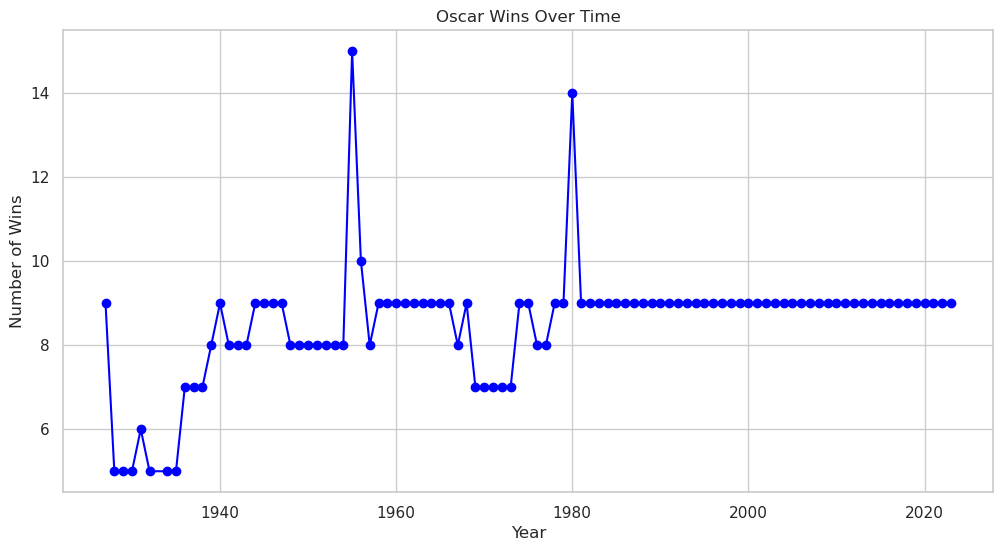

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "final_cleaned_oscars.csv"
df = pd.read_csv(file_path)

# Set style
sns.set(style="whitegrid")

# 1. Oscar Wins Over Time
plt.figure(figsize=(12, 6))
df[df['Winner'] == True]['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='blue')
plt.title("Oscar Wins Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Wins")
plt.show()

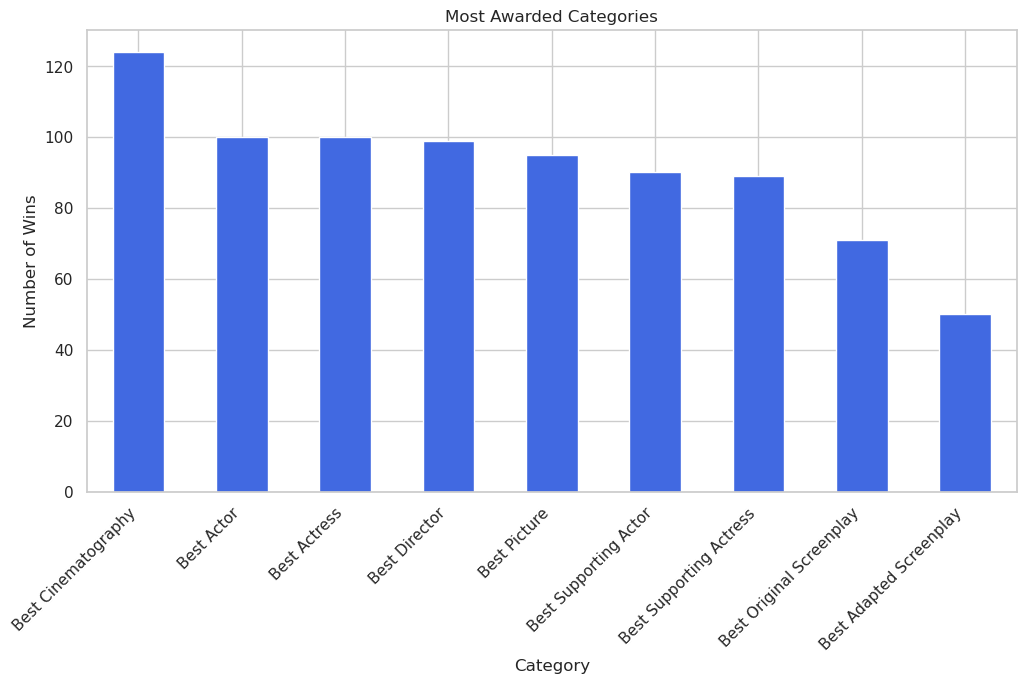

In [105]:
# 2. Most Awarded Categories
plt.figure(figsize=(12, 6))
df[df['Winner'] == True]['Category'].value_counts().head(10).plot(kind='bar', color='royalblue')
plt.title("Most Awarded Categories")
plt.xlabel("Category")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha="right")
plt.show()

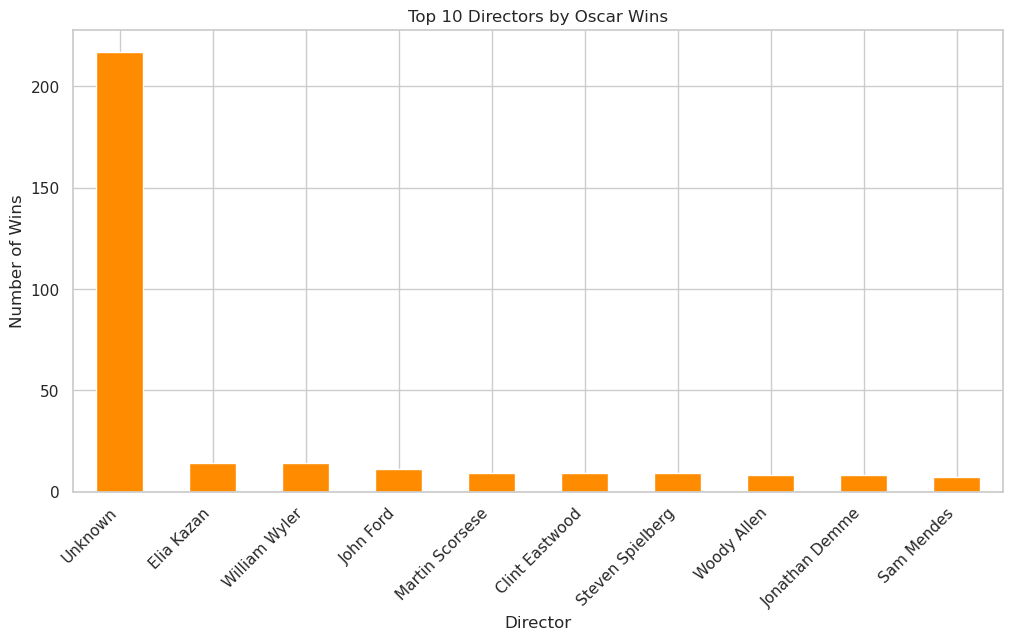

In [106]:
# 3. Top Directors by Oscar Wins
plt.figure(figsize=(12, 6))
df[df['Winner'] == True]['Director'].value_counts().head(10).plot(kind='bar', color='darkorange')
plt.title("Top 10 Directors by Oscar Wins")
plt.xlabel("Director")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha="right")
plt.show()

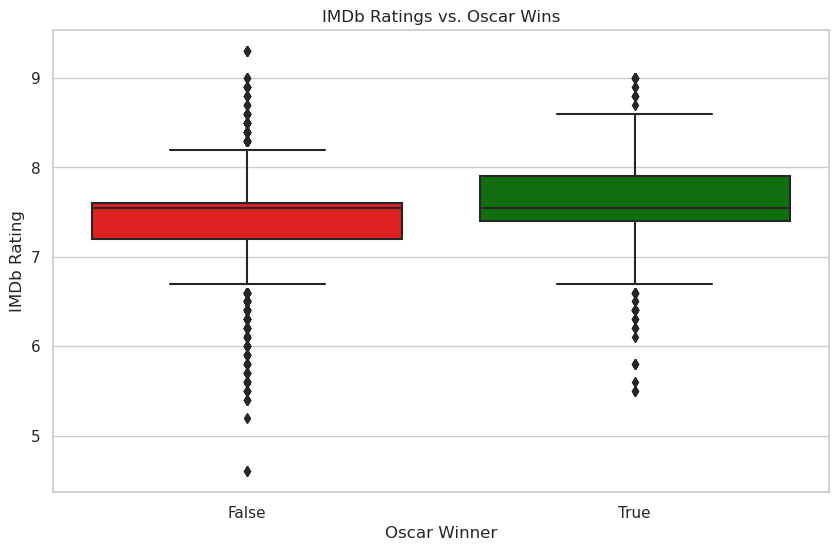

In [107]:
# 4. IMDb Ratings vs. Oscar Wins
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Winner'], y=df['IMDb_Rating'], palette=["red", "green"])
plt.title("IMDb Ratings vs. Oscar Wins")
plt.xlabel("Oscar Winner")
plt.ylabel("IMDb Rating")
plt.show()

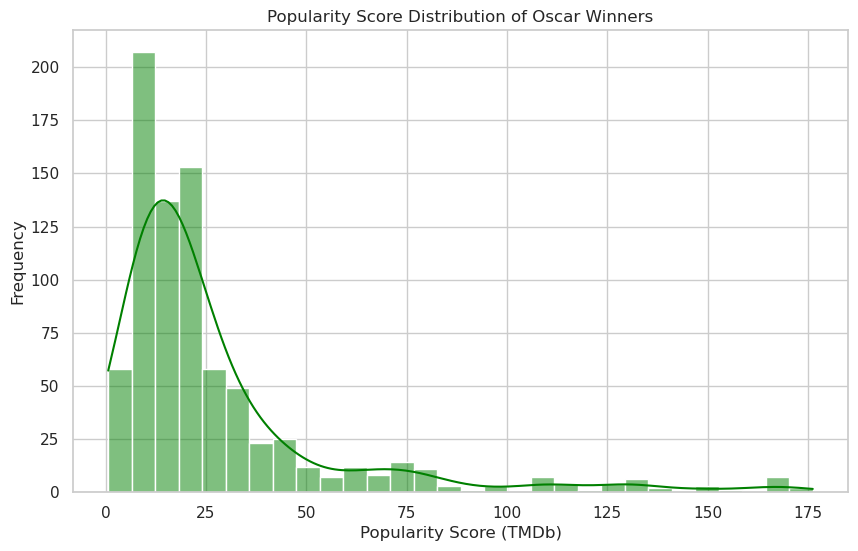

In [108]:
# 5. Popularity Score Distribution of Oscar Winners
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Winner'] == True]['Popularity'], bins=30, kde=True, color='green')
plt.title("Popularity Score Distribution of Oscar Winners")
plt.xlabel("Popularity Score (TMDb)")
plt.ylabel("Frequency")
plt.show()

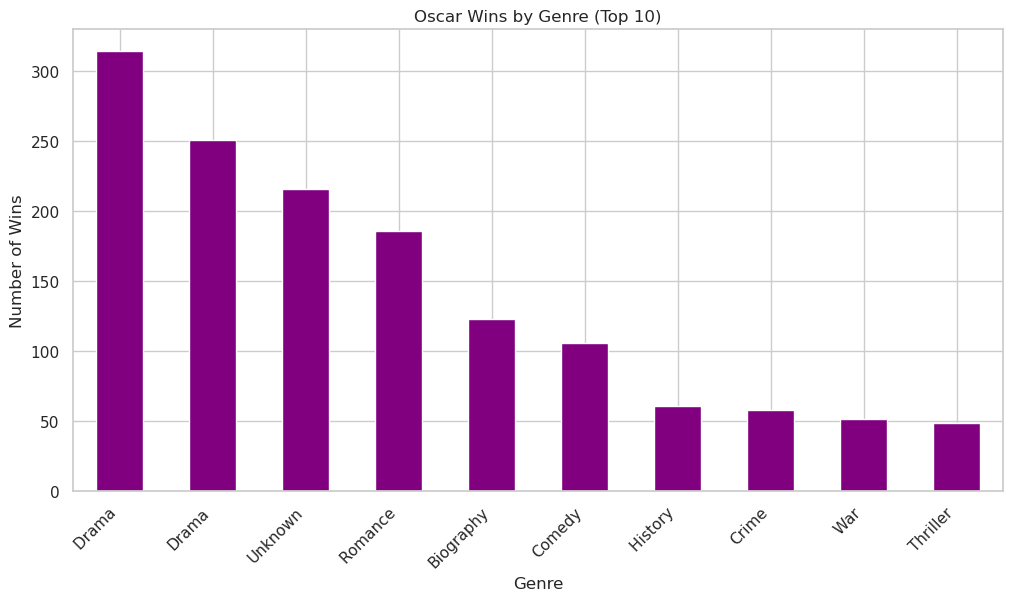

In [109]:
# 6. Oscar Wins by Genre
plt.figure(figsize=(12, 6))
genre_counts = df[df['Winner'] == True]['Genres'].str.split(',').explode().value_counts().head(10)
genre_counts.plot(kind='bar', color='purple')
plt.title("Oscar Wins by Genre (Top 10)")
plt.xlabel("Genre")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha="right")
plt.show()

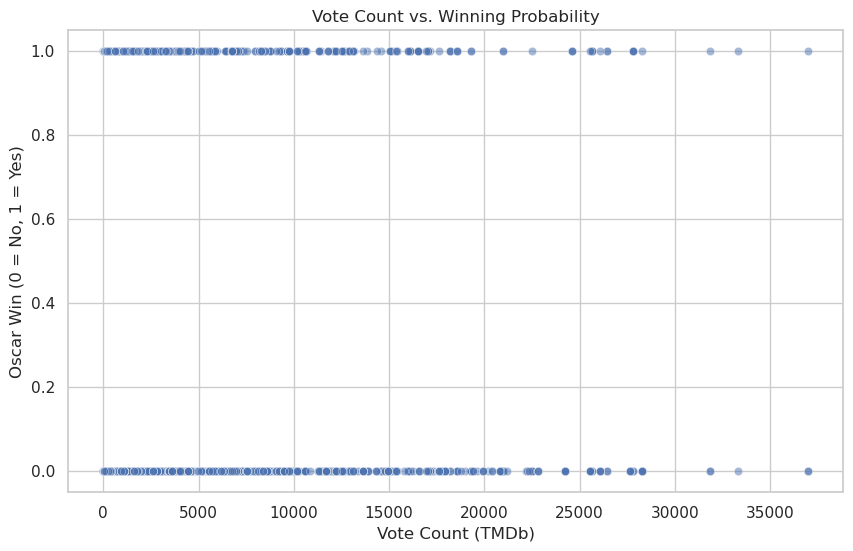

In [110]:
# 7. Relationship Between Vote Count and Winning Probability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Vote_Count', y=df['Winner'].astype(int), alpha=0.5)
plt.title("Vote Count vs. Winning Probability")
plt.xlabel("Vote Count (TMDb)")
plt.ylabel("Oscar Win (0 = No, 1 = Yes)")
plt.show()

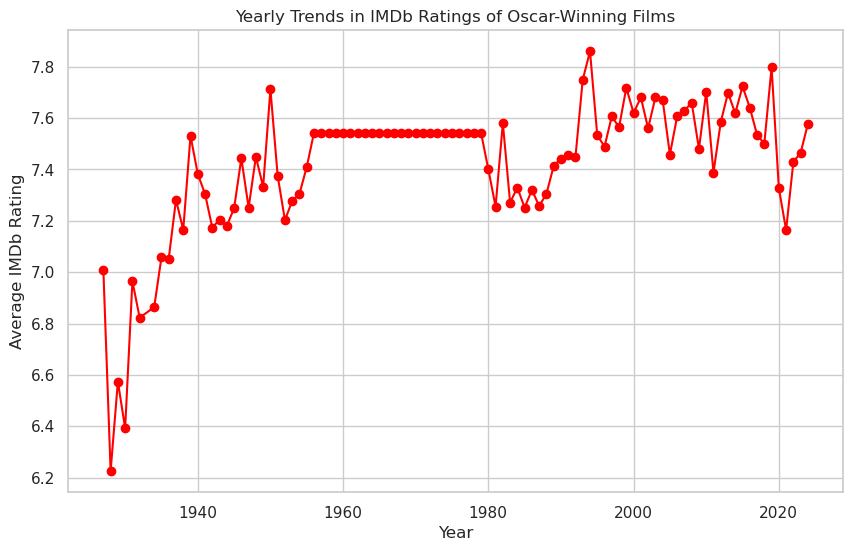

In [111]:
# 8. Yearly Trends in IMDb Ratings
plt.figure(figsize=(10, 6))
df.groupby('Year')['IMDb_Rating'].mean().plot(kind='line', marker='o', color='red')
plt.title("Yearly Trends in IMDb Ratings of Oscar-Winning Films")
plt.xlabel("Year")
plt.ylabel("Average IMDb Rating")
plt.show()

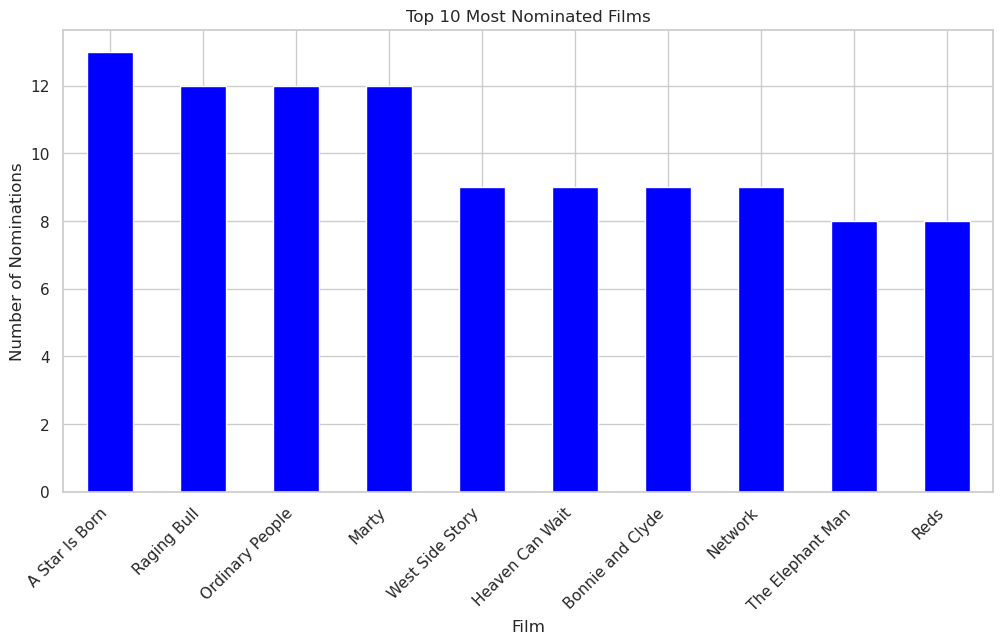

In [112]:
# 9. Most Nominated Films
plt.figure(figsize=(12, 6))
df['Film'].value_counts().head(10).plot(kind='bar', color='blue')
plt.title("Top 10 Most Nominated Films")
plt.xlabel("Film")
plt.ylabel("Number of Nominations")
plt.xticks(rotation=45, ha="right")
plt.show()

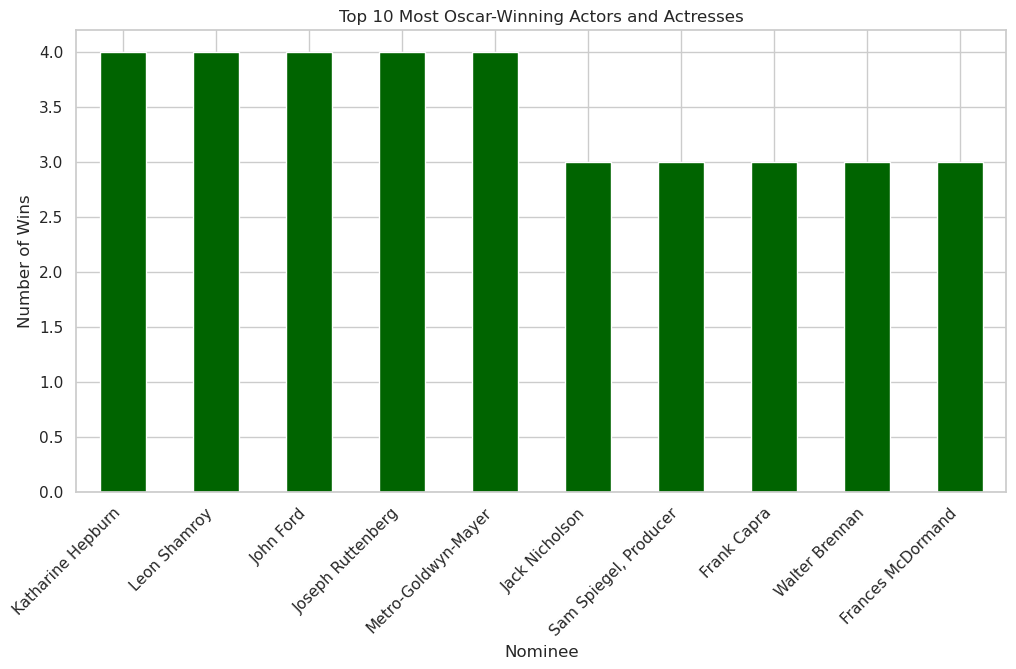

In [114]:
# 10. Most Winning Actors/Actresses

plt.figure(figsize=(12, 6))
df[df['Winner'] == True]['Nominee'].value_counts().head(10).plot(kind='bar', color='darkgreen')
plt.title("Top 10 Most Oscar-Winning Actors and Actresses")
plt.xlabel("Nominee")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha="right")
plt.show()